In [1]:
import pynq
from pynq import GPIO

__author__ = "Adam Taylor"
__copyright__ = "Copyright 2020, Adiuvo"
__email__ = "Adam@adiuvoengineering.com"


class xadc_scopeOverlay(pynq.Overlay):
    """.
    """
    def __init__(self, bitfile, **kwargs):
        super().__init__(bitfile, **kwargs)
        if self.is_loaded():
            pass

In [ ]:
from pynq import pl
from pynq import overlay
ol = xadc_scopeOverlay('design_1.bit')



In [ ]:
ol?

In [2]:
from pynq import pl
from pynq import overlay
# from pynq.overlays.xadc_scope import xadc_scopeOverlay
overlay = xadc_scopeOverlay('design_1_230KSPS.bit')

import numpy as np
from pynq import allocate
from pynq import Overlay
import matplotlib.pyplot as mp

input_buffer = allocate(shape=(128,), dtype=np.uint16)

dma = overlay.axi_dma_0
recvstatus = dma.recvchannel.running

dma.buffer_max_size
samples = 0
maxSamples = 30*128
xAdcVoltages = []
xFiltered = []


[56581 56582 56566 56630 56573 56573 56589 56541 56558 56610 56533 56561
 56570 56548 56613 56569 56510 56597 56561 56573 56539 56515 56542 56577
 56557 56573 56571 56562 56581 56582 56568 56633 56551 56547 56549 56541
 56550 56565 56530 56553 56590 56571 56571 56586 56569 56558 56556 56541
 56558 56587 56579 56673 56553 56587 56581 56593 56597 56569 56573 56582
 56575 56600 56550 56569 56604 56566 56571 56557 56543 56571 56565 56516
 56597 56557 56581 56586 56602 56581 56611 56533 56572 56590 56548 56593
 56589 56539 56649 56619 56572 56591 56561 56535 56558 56569 56573 56611
 56549 56533 56547 56542 56543 56597 56566 56591 56633 56554 56589 56529
 56544 56546 56531 56597 56567 56577 56579 56557 56555 56622 56578 56565
 56588 56555 56599 56554 56561 56586 56566 56527]


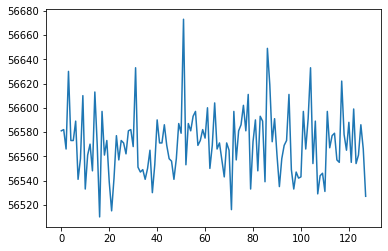

[56585 56578 56569 56658 56585 56513 56573 56553 56601 56615 56617 56570
 56585 56573 56585 56572 56557 56543 56545 56564 56565 56575 56571 56707
 56572 56579 56588 56568 56573 56555 56569 56615 56536 56606 56539 56563
 56615 56545 56590 56611 56549 56589 56598 56570 56539 56553 56578 56589
 56577 56641 56588 56561 56572 56569 56551 56578 56565 56566 56609 56569
 56591 56581 56554 56581 56548 56561 56565 56553 56561 56608 56575 56569
 56553 56549 56553 56574 56567 56586 56583 56561 56565 56577 56543 56543
 56610 56554 56599 56616 56597 56591 56569 56562 56573 56593 56608 56605
 56569 56587 56585 56519 56581 56586 56561 56578 56535 56567 56590 56570
 56583 56597 56553 56582 56553 56591 56601 56584 56545 56569 56565 56585
 56577 56583 56633 56581 56603 56629 56557 56580]


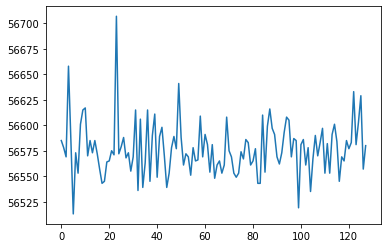

[56638 56550 56585 56594 56571 56547 56627 56594 56555 56607 56604 56614
 56546 56565 56553 56445 56542 56573 56526 56573 56609 56595 56597 56639
 56555 56600 56575 56567 56582 56517 56569 56559 56638 56583 56567 56594
 56589 56645 56589 56577 56555 56565 56574 56574 56585 56574 56553 56573
 56564 56553 56561 56535 56537 56603 56529 56581 56575 56551 56606 56601
 56544 56573 56559 56576 56516 56563 56561 56497 56585 56586 56596 56546
 56597 56605 56563 56557 56555 56579 56591 56541 56595 56593 56605 56590
 56597 56587 56579 56552 56545 56557 56551 56575 56567 56597 56599 56581
 56548 56578 56599 56573 56598 56549 56572 56578 56571 56585 56579 56583
 56610 56586 56610 56618 56610 56537 56593 56545 56546 56673 56524 56561
 56521 56549 56601 56590 56555 56613 56543 56575]


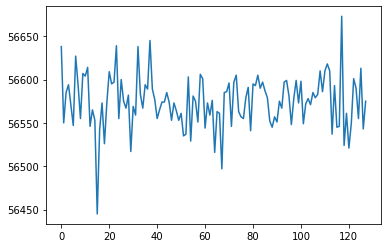

[56602 56513 56565 56557 56550 56596 56551 56577 56583 56582 56566 56561
 56617 56565 56579 56573 56564 56631 56533 56629 56559 56600 56574 56549
 56587 56588 56569 56578 56607 56555 56649 56609 56605 56543 56583 56603
 56576 56585 56577 56589 56565 56615 56591 56573 56609 56609 56575 56623
 56586 56561 56586 56527 56562 56501 56563 56557 56558 56585 56612 56574
 56571 56565 56553 56543 56519 56638 56587 56613 56589 56617 56609 56581
 56606 56551 56570 56601 56532 56585 56601 56558 56587 56616 56577 56555
 56533 56582 56522 56551 56585 56545 56570 56573 56586 56594 56573 56615
 56561 56565 56551 56555 56590 56483 56573 56567 56578 56632 56606 56558
 56613 56610 56548 56542 56518 56557 56591 56553 56582 56603 56588 56614
 56597 56573 56543 56541 56591 56581 56539 56552]


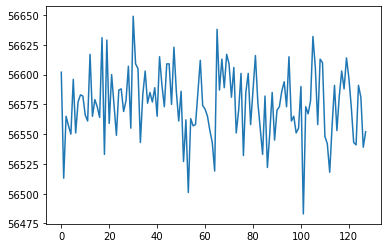

[56553 56542 56586 56543 56555 56590 56590 56587 56608 56583 56597 56573
 56547 56569 56618 56583 56586 56583 56587 56539 56613 56549 56579 56546
 56609 56549 56534 56617 56582 56541 56605 56551 56591 56601 56597 56600
 56609 56581 56545 56569 56549 56582 56563 56567 56576 56583 56557 56549
 56578 56602 56585 56577 56629 56581 56568 56577 56578 56561 56544 56557
 56549 56574 56587 56599 56589 56591 56623 56582 56537 56571 56539 56583
 56583 56494 56613 56589 56612 56609 56579 56645 56598 56533 56531 56586
 56543 56582 56581 56557 56653 56602 56569 56545 56578 56555 56587 56567
 56589 56607 56511 56569 56569 56569 56609 56593 56562 56548 56559 56554
 56561 56571 56606 56586 56539 56563 56594 56583 56570 56569 56552 56585
 56542 56565 56610 56577 56612 56587 56601 56601]


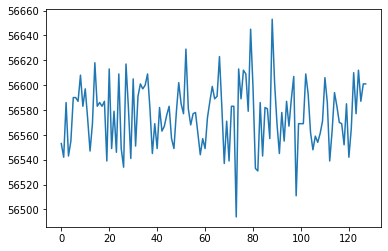

[56592 56595 56597 56549 56527 56570 56573 56567 56613 56609 56579 56625
 56603 56618 56565 56601 56569 56567 56582 56603 56561 56605 56553 56530
 56578 56569 56603 56635 56543 56561 56555 56509 56568 56630 56561 56551
 56579 56560 56589 56587 56573 56573 56573 56547 56559 56531 56599 56563
 56551 56617 56608 56577 56573 56589 56585 56562 56577 56617 56553 56560
 56580 56567 56538 56567 56609 56591 56595 56577 56587 56617 56550 56644
 56567 56590 56599 56552 56543 56585 56586 56573 56559 56537 56624 56625
 56567 56614 56603 56569 56581 56567 56587 56575 56517 56586 56608 56571
 56589 56607 56586 56634 56583 56595 56599 56591 56544 56587 56566 56553
 56558 56579 56585 56591 56597 56616 56623 56573 56565 56546 56572 56567
 56553 56621 56570 56570 56672 56577 56549 56605]


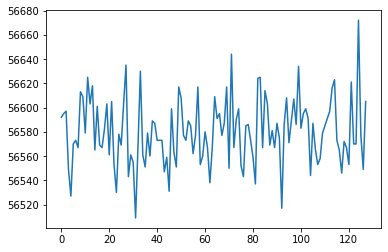

[56565 56578 56556 56577 56539 56554 56532 56559 56629 56582 56595 56600
 56570 56571 56587 56543 56561 56527 56559 56585 56579 56623 56623 56553
 56578 56577 56557 56557 56601 56550 56549 56545 56584 56582 56459 56593
 56565 56623 56594 56545 56581 56608 56574 56602 56613 56545 56576 56583
 56561 56545 56551 56553 56591 56600 56563 56578 56572 56595 56534 56560
 56577 56593 56581 56537 56535 56555 56602 56522 56585 56523 56586 56619
 56581 56576 56581 56536 56538 56525 56509 56549 56551 56611 56594 56595
 56530 56619 56549 56562 56581 56544 56551 56595 56545 56581 56566 56554
 56633 56590 56573 56574 56585 56603 56581 56559 56562 56595 56553 56605
 56569 56599 56639 56565 56565 56589 56518 56535 56716 56549 56570 56519
 56563 56573 56507 56554 56573 56549 56537 56549]


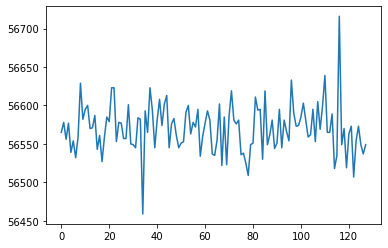

[56551 56577 56554 56553 56583 56622 56617 56561 56589 56584 56581 56534
 56536 56600 56568 56507 56589 56570 56609 56599 56585 56613 56565 56550
 56598 56572 56593 56583 56576 56599 56599 56604 56605 56545 56573 56528
 56555 56533 56575 56535 56599 56524 56560 56633 56580 56641 56573 56502
 56547 56585 56551 56573 56587 56506 56590 56600 56530 56615 56601 56467
 56557 56569 56590 56545 56537 56465 56575 56571 56622 56605 56601 56635
 56573 56609 56605 56562 56585 56585 56568 56578 56614 56545 56602 56602
 56561 56543 56549 56557 56571 56557 56568 56577 56577 56573 56627 56561
 56580 56535 56557 56555 56559 56551 56597 56538 56597 56603 56578 56572
 56553 56565 56597 56527 56582 56601 56531 56626 56604 56578 56590 56582
 56586 56589 56601 56625 56595 56553 56566 56562]


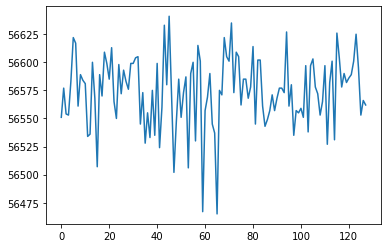

[56585 56558 56642 56553 56593 56595 56575 56570 56603 56595 56576 56558
 56577 56570 56557 56549 56590 56601 56648 56566 56603 56582 56557 56544
 56567 56604 56533 56527 56547 56563 56572 56550 56585 56577 56600 56523
 56623 56518 56551 56577 56644 56546 56579 56645 56569 56585 56521 56611
 56583 56549 56559 56596 56562 56553 56576 56591 56587 56585 56594 56545
 56573 56625 56567 56602 56570 56554 56553 56575 56589 56575 56593 56575
 56543 56601 56582 56573 56585 56605 56585 56569 56606 56537 56581 56572
 56575 56571 56571 56578 56567 56521 56586 56562 56567 56589 56553 56602
 56592 56590 56562 56591 56539 56499 56581 56559 56611 56607 56553 56571
 56590 56546 56611 56572 56541 56609 56574 56561 56573 56535 56583 56589
 56550 56594 56577 56611 56584 56553 56549 56601]


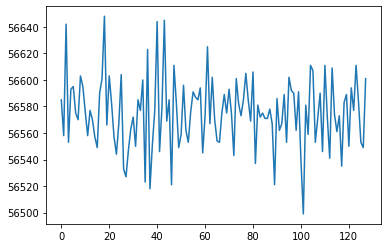

[56565 26622 29207 31608 36805 38816 30734 26174 30618 34002 36782 36109
 29369 27897 32697 35254 35816 33886 29705 29964 33521 34674 34032 32793
 31351 31706 32843 33125 33056 33404 33776 32246 30578 32006 33627 34734
 35490 31298 27638 32103 35850 35763 35007 29315 26032 33324 37476 35182
 32495 27883 27027 35311 38243 33831 30391 27486 29554 37553 37841 31774
 28950 28173 32206 39210 36365 29327 28125 29569 34581 39813 34368 27385
 28643 31708 35488 38654 32813 26977 30238 33786 35256 36248 32075 28951
 31830 33846 33733 33640 33072 32631 31926 31632 32248 33292 35384 34746
 30075 28889 32115 34817 37239 34572 27371 28093 33856 36355 37194 32490
 26082 29189 35560 36159 35091 31301 27538 31169 35618 34748 33319 32009
 30954 32109 33089 33256 33340 33724 33866 31059]


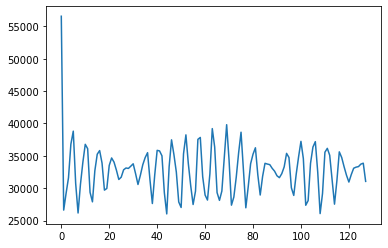

[29611 36835 32637 29746 27656 32749 38095 34628 31214 30750 30626 32864
 34549 33572 32887 32774 32599 31300 30978 34152 35691 33599 31708 29317
 30094 36091 37268 32737 29954 28537 31450 38265 36860 30378 28635 29151
 33696 39716 35272 27895 28121 30762 35452 39764 33309 26139 29234 33424
 36591 38936 30936 24431 30785 35766 36379 36219 29369 25577 32705 37009
 35514 33376 29045 28160 34024 36087 33868 31949 30186 30984 34104 34762
 33241 32466 32221 32206 32356 32891 33567 33720 33576 31903 29836 32247
 35559 34823 33497 30351 27646 33097 38352 34824 31620 29002 27177 34898
 40317 33813 29301 28686 29867 37297 40045 31864 27590 29401 32499 38344
 38103 29914 27012 30942 34739 38477 35556 27757 27793 33037 35842 37367
 32782 26736 29684 34984 35875 35462 31460 27575]


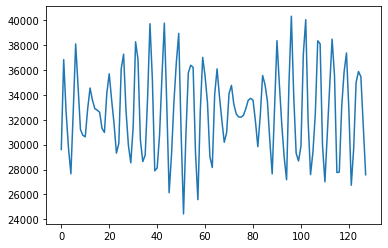

[31444 35036 31945 29533 27983 34729 38767 33370 29792 29357 30144 36060
 37661 31576 28584 30014 32453 36926 36327 30042 28445 31422 34409 37261
 34492 28390 29112 33346 35615 36833 32394 27004 30071 35162 35833 35434
 30898 26594 31434 36828 35319 33608 29880 26975 33082 38043 34419 31588
 29457 28748 34954 38169 33313 30208 29846 31276 36463 37174 31510 29039
 30336 33155 37539 35656 29172 28215 31502 34888 38168 34078 26992 28531
 33737 36411 37933 32009 25080 29819 36243 36634 36171 30064 24955 31732
 37711 35528 33573 30040 27905 33059 36298 34134 32585 31803 31568 32339
 32938 33519 33807 34020 32847 29705 30589 34975 36325 35068 31660 27002
 30078 37495 37391 33772 29839 26248 31223 39036 36681 31671 29409 28155
 33190 38234 34646 30894 30964 31205 32761 34035]


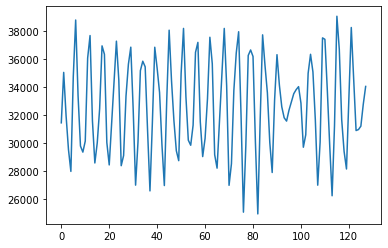

[33769 28595 28524 34741 36928 34908 31949 28113 30049 36316 36419 33112
 30381 28256 32119 37729 35410 31184 29729 29205 33695 38376 34134 29431
 29980 30826 35224 38682 32517 27905 30515 32723 35908 37271 30780 27303
 31721 34812 36439 35243 28794 27406 33502 36530 36254 33039 27054 28411
 35952 37566 35151 30882 26140 30276 38086 37035 32887 29614 27018 32181
 38634 35783 31235 30044 29573 33296 36841 33917 31242 31556 31909 32485
 32945 33740 34192 33211 32183 30266 30274 35424 37356 33135 30256 28522
 30302 37795 38248 31312 28383 28691 32541 39097 36837 29571 28709 30800
 34145 37619 34612 30012 30437 32291 33268 33817 33728 33543 32513 31575
 31177 30876 35152 38270 32533 28381 29647 31168 37103 39261 30750 26165
 30083 33702 37921 37203 29222 26788 31817 34884]


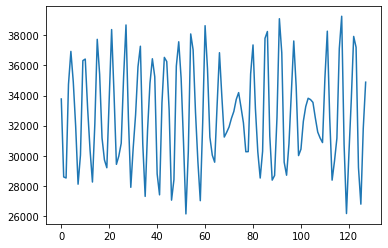

[36389 32844 32459 32576 32225 31736 33116 34733 33994 32786 30900 29297
 33659 37866 34177 30788 29295 28273 35278 40213 33231 28445 29067 30310
 37113 38947 31136 26645 29635 32953 37806 37427 29446 27042 31572 34830
 37286 34544 28269 29099 33864 35760 36142 32753 28075 30914 35539 35814
 34776 31271 27988 32329 36997 35244 32999 30184 28007 33924 38674 34316
 30854 29379 28925 35772 39369 32649 28725 29293 31553 37901 38232 30368
 26926 29927 33624 38578 36877 28699 27179 31906 35302 37843 34365 27641
 29099 33892 35627 35893 32713 29117 30852 33809 33987 33549 33065 32665
 31906 31339 32281 33119 34970 36032 30712 27306 31837 35146 36739 36092
 28445 25737 33252 37417 36781 33950 27342 27162 35002 37657 35073 32066
 28564 30268 35105 35542 33491 32398 31783 31762]


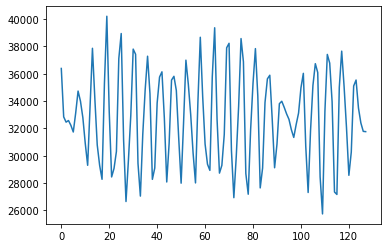

[32061 29603 33273 37969 35138 30089 29879 30962 34618 38192 33357 28179
 30227 32637 35634 38009 31464 26578 31184 34642 36099 36123 29890 26700
 32635 36183 35717 33742 28611 27795 34304 36659 34523 31716 28059 29686
 36107 36587 33057 30318 28399 31841 37687 35534 30946 29565 29132 33655
 38662 34061 28835 29421 30626 35058 38894 32632 27389 30202 32723 35876
 37620 31048 27075 31533 34653 35935 35366 29675 27841 33069 35870 35454
 33278 28640 29599 35280 36439 34464 31502 28037 31061 37252 36841 33096
 30130 27875 32507 39126 35925 30456 28957 28449 34936 41113 34601 27805
 28929 30411 36271 40737 32525 26356 29934 32885 36197 37073 31166 28249
 31716 33920 34662 34348 32356 31519 32165 32522 32534 33379 35042 33831
 30495 30098 31691 34632 37967 33853 27246 29113]


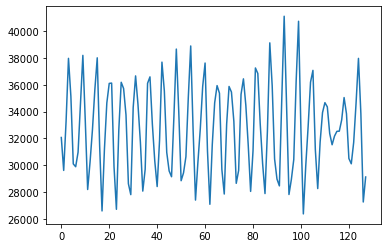

[33263 36744 35530 31648 26581 28797 36607 37367 34054 30034 26391 31264
 38796 36447 31685 29172 27568 33164 39226 34876 30020 29788 30004 34442
 37783 33435 30182 31282 32197 33584 34334 33155 32363 32413 32334 31887
 32395 34492 34809 32429 31040 30659 32366 36505 35602 30814 29515 30538
 33833 38238 34837 28159 29125 32049 35886 39314 33132 25995 29276 34100
 36672 38444 30896 24229 30833 36761 36579 35731 28595 24174 32885 38292
 35691 32862 27927 26840 34874 38230 34152 31056 28634 29902 36061 36997
 32733 30478 30080 31855 35498 34802 31881 31240 31679 32533 33567 33474
 33142 32859 32582 31704 30870 33426 35979 33835 31542 30216 29203 34844
 39168 33379 29055 29265 30152 36663 39362 31315 26793 29545 32709 37898
 37786 29649 26717 31264 34844 37725 35244 27984]


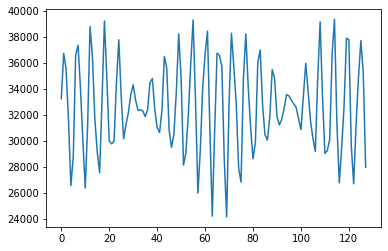

[28270 36053 34092 30790 27963 31954 36101 34552 32785 31949 31422 32210
 32774 33391 33779 33948 33735 30336 29281 34076 36685 35364 33223 28147
 27578 35667 38628 34738 30992 27083 29105 37409 38116 32802 29814 28452
 31712 37177 35592 31728 30847 31152 32345 33739 33852 33577 33199 32767
 31010 29485 34014 37899 34606 31625 29027 27477 35590 40765 33092 28867
 28287 29448 37059 39678 31961 28354 29914 32422 36691 36495 31368 30104
 31835 33091 34216 33990 33039 32539 32222 31907 31519 33481 36041 33729
 30512 30128 30514 34788 38866 33122 27487 29585 31640 36365 39804 31418
 25015 30018 34030 37118 37879 29603 24809 31801 36332 36986 34876 27656
 25990 33870 37065 35462 31942 26649 28604 36322 37515 34060 30616 27350
 30936 37677 36351 32055 29991 28857 32745 37419]


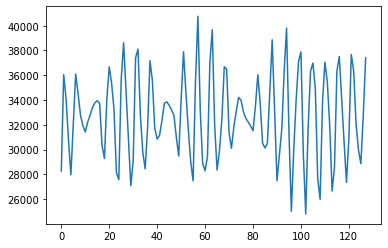

[34556 40789 34449 28103 28893 30132 36311 40765 32306 25918 29631 32827
 37037 38442 30249 25909 31304 34952 36723 35545 29139 27777 33014 35316
 35175 33575 30214 30354 33324 34189 33623 33155 32819 32191 31494 32075
 33113 34371 35558 31865 27836 30849 34706 35943 36579 30090 24647 31586
 37605 36332 34992 28893 25308 33553 38670 35443 32563 29355 28855 34274
 36649 33815 32076 31463 31640 32901 33494 33504 33519 33453 32057 29931
 31534 35228 35246 33811 30544 27107 31657 38186 35899 32173 28885 26313
 33833 40865 34910 29584 28544 27986 35606 40842 33073 27769 29213 30964
 36435 38358 31197 27398 30452 33178 36475 36305 30056 28320 32269 34912
 36261 34188 28753 29460 34186 35904 35666 32357 27733 30416 35935 36102
 34308 30699 27216 32005 37879 35587 32393 29691]


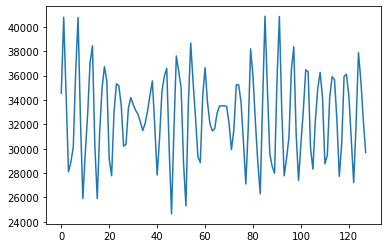

[27610 26994 30454 37783 36867 32895 29547 26898 32278 39510 35877 30396
 28731 27991 34559 40989 34083 27572 28579 29978 36327 40739 31663 25946
 29709 32839 36872 37830 30226 26878 31611 34786 36215 35491 30430 29019
 32705 34489 34352 33511 32029 31684 32265 32587 32805 33735 34897 32935
 29752 30682 33061 35332 37249 32174 26365 30228 35153 36533 37297 30274
 24308 31518 37399 36131 34754 29539 26388 32907 36968 34614 32762 30835
 30471 33079 34206 33345 33025 33109 32503 31066 31658 33926 34806 34672
 31984 28239 30695 35928 36231 34322 30404 26478 31702 38582 35984 32160
 28939 26448 33704 40500 34934 29744 28692 28309 36007 41525 33547 27761
 29211 31100 37239 39528 30961 26429 30168 33567 37617 37067 29141 26888
 31991 35274 36973 34380 28271 28709 33689 35326]


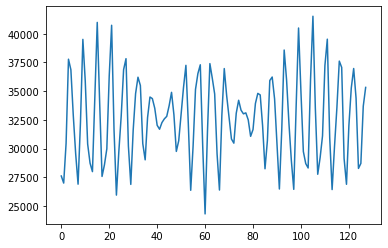

[35132 32795 32845 32801 32827 32811 32820 32806 32821 32836 32819 32838
 32793 32821 32799 32813 32822 32858 32795 32831 32813 32819 32825 32789
 32803 32816 32793 32827 32804 32792 32835 32805 32813 32802 32813 32811
 32795 32793 32803 32795 32794 32851 32821 32820 32868 32785 32768 32809
 32797 32781 32822 32811 32827 32836 32816 32828 32855 32810 32813 32827
 32792 32790 32836 32769 32821 32817 32785 32847 32813 32817 32743 32811
 32821 32770 32811 32811 32807 32820 32828 32807 32807 32810 32839 32819
 32801 32798 32831 32823 32812 32803 32793 32793 32825 32811 32842 32825
 32785 32848 32823 32799 32811 32793 32803 32839 32813 32871 32820 32805
 32802 32813 32802 32801 32789 32803 32857 32796 32821 32809 32797 32809
 32835 32797 32819 32804 32807 32819 32747 32849]


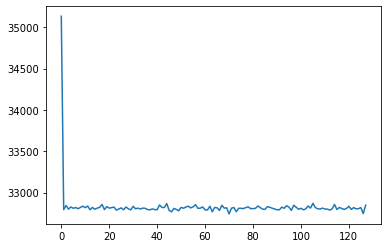

[32799 26976 30630 34648 34805 34642 31854 29597 32055 33878 33433 33101
 33074 32820 31843 31323 32552 33592 34834 34416 30214 29213 33136 35444
 36047 33456 27824 28379 34757 36641 35436 31465 26224 29627 37357 37193
 33880 29854 26200 31865 39150 36089 31492 29138 27580 33961 39810 34017
 29254 29368 29783 35114 38474 32373 28533 30428 32271 35750 36416 30900
 28753 31782 34209 36243 34879 29269 28915 33417 35697 36288 33089 27422
 29235 35440 36531 35345 30774 25708 30539 37907 36649 33501 29329 25781
 32946 40105 35417 30874 28801 27278 34186 39836 34018 29586 29792 30574
 35029 37196 32841 30361 31436 32425 33728 34110 33005 32341 32413 32245
 31837 32802 34766 34392 32108 30961 30559 33045 36999 34791 30202 29657
 30628 34656 38808 34240 27787 29533 32349 36315]


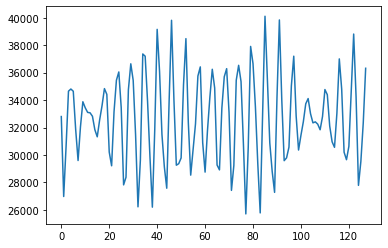

[39604 38098 35390 33066 30288 28629 33015 35738 33796 32426 32178 32007
 31970 32339 33591 34268 34171 32690 29413 29864 34936 36427 34527 31348
 27212 30175 37582 37305 33087 29550 26731 32369 39758 36339 30643 28845
 28099 34428 40405 34240 28441 29187 30335 35682 39318 32253 27470 30422
 32929 36141 37106 30781 27621 31768 34614 36042 34959 29405 28497 33541
 35918 35634 33068 28204 29442 35316 36389 34532 31252 27580 31268 37383
 36229 32899 30146 27952 33166 38780 35128 30785 29693 29156 34646 39168
 33493 29085 30110 31255 35748 37941 31701 27727 30591 32966 36095 36547
 29515 27700 32045 34943 36556 34482 28213 28093 34016 36440 36261 32483
 26534 29265 36559 37333 34940 30374 25740 31135 38760 36585 32551 29303
 26888 33189 39394 35153 30788 29979 29551 33873]


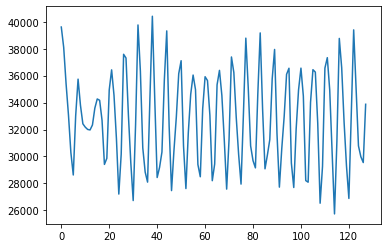

[36956 28369 28950 34316 40335 34928 27586 28585 31065 35351 39115 32885
 27380 30196 32912 34434 35505 32736 30769 31798 32552 32544 32757 34358
 34677 31704 30153 31137 32915 36772 35680 29466 27936 31258 34648 38092
 34586 27402 27721 33269 36382 38004 32955 25806 28652 35382 36591 36115
 30620 25436 30723 37198 35932 33909 29864 26624 33202 38304 34618 31760
 29768 28882 34636 37798 33315 30332 29986 30869 35756 36700 31514 29185
 30394 32945 37117 35622 29431 28696 31742 34911 38048 34300 27254 28543
 33572 36255 37763 31939 25007 29622 36067 36623 36140 30086 24767 31503
 38044 35885 33765 29555 26719 33329 37665 34312 31905 30418 30190 33755
 35376 33348 32246 32162 32145 32335 32757 33634 33833 33464 32191 30063
 31453 35426 35569 33330 30695 28179 31937 38013]


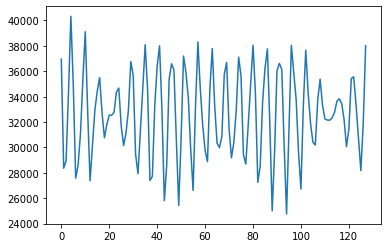

[35652 30916 34152 37743 33689 29035 29327 30430 35792 40597 32626 25557
 29190 32439 36991 39450 30922 25323 30652 34408 36057 36294 31007 28404
 32099 34174 34060 33659 32697 32084 31807 31945 32484 33680 35511 33590
 29487 29705 32605 35148 37374 33038 26640 29578 34840 36619 37369 31190
 24673 30559 37343 36731 35496 29229 24346 32595 38916 35411 32412 28559
 26862 34492 38665 34025 30806 29269 30076 35748 37231 32409 30156 30306
 32405 36639 35426 30548 29514 31204 33894 37107 34128 28863 29916 32937
 35534 37650 32549 26645 30493 35273 36625 37242 30310 24492 31509 37809
 36612 35207 28825 24445 33172 39168 35434 32264 28389 27436 35091 38464
 33813 30698 29299 30461 35511 36453 32637 30930 31097 32231 34134 34129
 32922 32447 32559 32183 31609 33052 34948 34093]


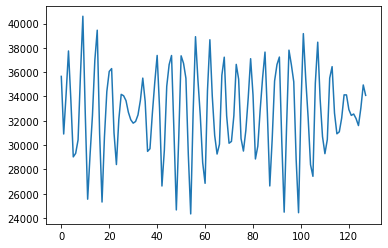

[32467 32295 36809 35890 30198 28871 30968 34208 37958 34655 27911 28644
 32727 35931 38326 32483 25509 29133 35010 36631 37127 30492 24403 31384
 37695 36219 34706 29351 25793 33081 37697 34708 32281 29754 29109 33831
 35900 33424 31853 31431 31657 32939 33491 33303 33205 33195 32249 30706
 32003 34843 34896 33573 31072 28325 32059 37465 35743 32307 29549 27406
 33691 40162 35324 29954 28933 28407 35305 41056 33451 27564 29286 30985
 36625 39492 31604 27052 30576 33510 36797 36501 29835 27819 32217 35076
 36280 34278 28851 28877 33900 35758 35330 32230 27927 30444 35919 35816
 33936 30624 27384 31878 37736 35310 32020 29552 27686 34064 39478 34286
 30005 29441 29341 35368 39069 32848 28745 30109 31933 36294 37382 31253
 28616 31405 33925 36675 35400 29460 28527 32781]


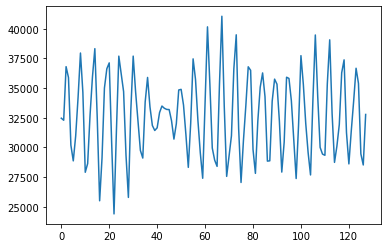

[35250 35138 38248 33795 26876 28892 33853 36407 37858 31500 24705 30100
 36447 36556 36153 29725 24443 32005 38195 35722 33508 29321 27090 33755
 37413 34133 31797 30258 30486 33934 35190 33231 32174 32156 32178 32334
 32864 33708 33827 33399 31937 29838 31940 35795 35312 33197 30452 27965
 32353 38370 35374 31078 28968 27632 34256 40633 34385 28352 28853 29355
 36125 40891 32579 26852 29735 32380 37017 38546 30785 26986 31220 34296
 36554 35567 29469 28437 32984 35322 35742 33310 28857 29826 34575 35671
 34634 31650 28170 31570 36654 35481 33075 30186 27640 33146 38882 35039
 30888 29121 27839 35012 40695 33323 28079 28822 30098 37167 40547 31669
 26590 29635 32777 37719 37582 29638 27126 31460 34550 36716 34994 29705
 29231 32675 34252 34455 33523 31949 31740 32222]


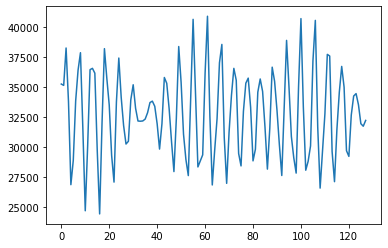

[32478 33819 37283 36655 33332 26712 27270 35462 37315 34758 31244 27312
 29826 35852 35736 33079 31376 30266 31856 34001 33774 33031 32959 33012
 31653 30329 32845 35283 34596 33775 29946 27572 34038 38206 34898 32074
 28583 28078 36020 39240 33635 29926 28209 30370 38026 38594 31436 28555
 29130 32871 39158 37007 29179 27783 30475 34608 39055 34536 27070 28431
 32709 35867 38260 32131 25855 29970 34942 36008 36441 31053 26556 31873
 36100 35106 33952 31040 29307 32725 34836 33722 32926 32333 32059 32241
 32515 33147 33583 33977 33001 30402 30972 34123 35299 34966 32159 28187
 30603 36096 36169 34124 30318 26630 31929 38669 36006 32059 28965 26652
 34109 40935 34750 29234 28495 28247 36041 40847 32489 27038 28997 31353
 37367 38959 30674 27067 30816 34099 37594 36836]


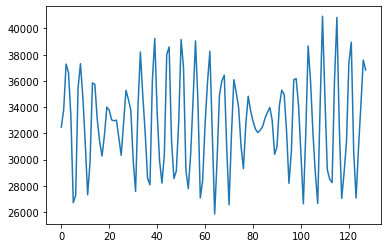

[29517 38840 36081 32355 29700 27783 33467 38522 34438 30965 30610 30622
 33835 35723 33295 31744 32072 32327 32397 32785 33784 34025 33040 31939
 30388 31561 35674 35568 32231 30159 29061 32312 38098 35788 30110 28886
 29417 34476 40074 34504 27602 28255 30850 35575 39820 32787 25719 29333
 33418 36251 38424 31078 25505 31264 35494 35969 35482 29851 27155 32956
 36269 35038 33139 29325 29421 34779 36556 34002 31602 29119 30836 36308
 35830 32091 29922 28811 32483 38124 35374 29902 29081 29571 34725 40075
 34060 27215 28727 31268 36495 40651 32279 25165 29920 34063 37037 37904
 30048 25191 31408 35438 35951 34952 30034 28797 33007 34845 34170 33209
 31989 31611 32161 32621 32983 33791 34830 33112 29534 30566 33715 35515
 36680 32129 26390 30326 36091 36661 36188 30234]


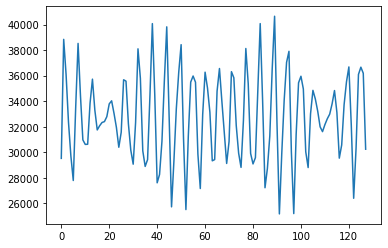

[24853 32831 32817 32822 32847 32771 32825 32807 32805 32801 32800 32755
 32836 32839 32802 32822 32811 32772 32803 32798 32778 32837 32794 32807
 32849 32816 32782 32827 32801 32828 32821 32831 32825 32795 32819 32809
 32821 32825 32833 32853 32837 32787 32781 32794 32805 32790 32805 32785
 32785 32837 32825 32827 32840 32823 32833 32819 32801 32811 32799 32811
 32831 32807 32798 32826 32809 32803 32811 32832 32809 32816 32821 32818
 32801 32779 32821 32831 32810 32807 32793 32810 32801 32811 32783 32816
 32797 32792 32823 32805 32827 32839 32744 32823 32797 32806 32779 32824
 32807 32823 32833 32847 32828 32832 32804 32797 32830 32791 32810 32783
 32787 32801 32806 32779 32822 32818 32801 32820 32823 32789 32793 32795
 32819 32820 32797 32787 32797 32799 32891 32791]


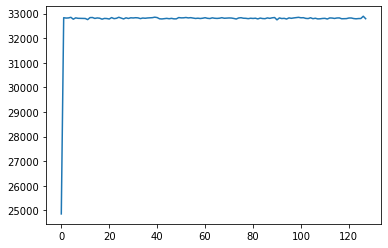

[32807 37453 31541 29005 30336 32982 37253 35803 29762 28819 31676 34528
 37238 33952 28187 29220 33251 35417 36601 32401 27098 30423 35370 35802
 35444 30651 26382 32219 37517 35420 33587 29525 26780 33823 38285 34264
 31272 29025 28921 35582 37873 32742 29715 29321 31334 36839 36967 31149
 29109 30426 33385 37458 35067 29282 29124 31839 34662 37170 33267 27897
 29998 33673 35459 36550 31716 26894 31584 36077 35943 35535 29974 26073
 33039 38106 35600 33314 28694 27147 35184 39254 34474 30856 28075 29219
 37164 38486 32215 28919 28481 31236 37801 37047 30560 28757 30214 33323
 37321 35084 30077 30028 32009 33815 35244 33523 31346 31701 32543 32751
 32755 33589 34390 32633 31181 31348 31696 35252 37119 31770 28641 30806
 32861 36856 37479 30029 26911 31484 35009 37725]


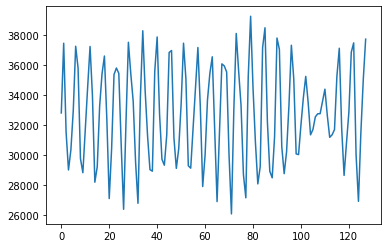

[56581, 56582, 56566, 56630, 56573, 56573, 56589, 56541, 56558, 56610, 56533, 56561, 56570, 56548, 56613, 56569, 56510, 56597, 56561, 56573, 56539, 56515, 56542, 56577, 56557, 56573, 56571, 56562, 56581, 56582, 56568, 56633, 56551, 56547, 56549, 56541, 56550, 56565, 56530, 56553, 56590, 56571, 56571, 56586, 56569, 56558, 56556, 56541, 56558, 56587, 56579, 56673, 56553, 56587, 56581, 56593, 56597, 56569, 56573, 56582, 56575, 56600, 56550, 56569, 56604, 56566, 56571, 56557, 56543, 56571, 56565, 56516, 56597, 56557, 56581, 56586, 56602, 56581, 56611, 56533, 56572, 56590, 56548, 56593, 56589, 56539, 56649, 56619, 56572, 56591, 56561, 56535, 56558, 56569, 56573, 56611, 56549, 56533, 56547, 56542, 56543, 56597, 56566, 56591, 56633, 56554, 56589, 56529, 56544, 56546, 56531, 56597, 56567, 56577, 56579, 56557, 56555, 56622, 56578, 56565, 56588, 56555, 56599, 56554, 56561, 56586, 56566, 56527, 56585, 56578, 56569, 56658, 56585, 56513, 56573, 56553, 56601, 56615, 56617, 56570, 56585, 56573, 56585

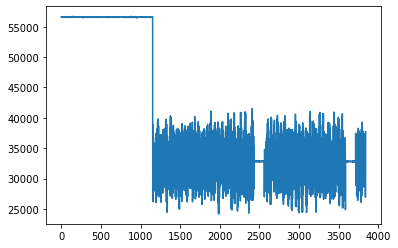

In [3]:
while samples < maxSamples:
    dma.recvchannel.transfer(input_buffer)
    await dma.recvchannel.wait_async()
    print(input_buffer)   
    
    xAdcVoltages += list(input_buffer)
    samples += 128

    mp.plot(input_buffer)
    mp.show()
#     mp.clf()

print(xAdcVoltages)
mp.plot(xAdcVoltages)
mp.show()

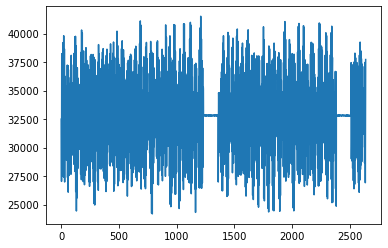

In [4]:
# xFiltered = []
# for i in range(0,len(xAdcVoltages)):
#     if xAdcVoltages[i] < 20000:
#         xFiltered.append(xAdcVoltages[i])
        
mp.plot(xAdcVoltages[1200:4000])
mp.show()